# 回归算法评价MSE RMSE MAE

## 一、目标：

函数：$\hat{y}_{test}^{(i)} = ax_{test}^{(i)} + b$


找到a和b


使$\sum\limits_{i=1}^{m}(y_{train}^{(i)}-ax_{train}^{(i)} - b)^{2}$尽可能小


等同于$\sum\limits_{i=1}^{m}(y_{train}^{(i)}-\hat{y}_{train}^{(i)})^{2}$


但上式与数据集元素个数m有关，采取均方误差

## 二、评价标准：

### 1、均方误差MSE（mean squared error）

真值和预测值差的平方的平均值

$$MSE = \frac{1}{m}\sum\limits_{i=1}^{m}(y_{test}^{(i)}-\hat{y}_{test}^{(i)})^{2}$$


但量纲为平方，存在问题，采取均方根误差:

In [28]:
from sklearn.metrics import mean_squared_error

### 2、均方根误差RMSE（root mean squared error）




$$RMSE = \sqrt{\frac{1}{m}\sum\limits_{i=1}^{m}(y_{test}^{(i)}-\hat{y}_{test}^{(i)})^{2}} = \sqrt{MSE_{test}}$$



* RMSE在sklearn中没有计算函数，需通过计算MSE的平方根来的出
* RMSE比MAS的值微大，因为mse是平方后的数值，会放大误差中较大的值，而MAE则不会

### 3、平均绝对误差MAE（mean absolute error）


$$MAE = \frac{1}{m}\sum\limits_{i=1}^{m}|y_{test}^{(i)}-\hat{y}_{test}^{(i)}|$$

In [29]:
from sklearn.metrics import mean_absolute_error

### 4、回归问题的误差评价的局限性
* 分类问题：accuracy_score：1最好，0最差
* 回归问题：不同事件的误差量纲不一样，不能通过MSE或MAE来统一比较，需要用**R squared**来评价

### 5、R score

$$R^{2} = 1 - \frac{SS_{residual}}{SS_{total}}$$


$$SS_{residual} = \sum\limits_i(\hat{y}^{(i)} - y^{(i)})^2$$


$$SS_{total} = \sum\limits_i(\overline{y}^{(i)} - y^{(i)})^2$$


$$R^{2} = 1 - \frac{\sum\limits_i(\hat{y}^{(i)} - y^{(i)})^2}{\sum\limits_i(\overline{y}^{(i)} - y^{(i)})^2}$$


$$R^{2} = 1 - \frac{\sum\limits_i(\hat{y}^{(i)} - y^{(i)})^2}{\sum\limits_i(\overline{y}^{(i)} - y^{(i)})^2} = 1 - \frac{\sum\limits_i(\hat{y}^{(i)} - y^{(i)})^2/m}{\sum\limits_i(\overline{y}^{(i)} - y^{(i)})^2/m}$$

$$= 1 - \frac{MSE(\hat{y},y)}{Var(y)}$$

$Var$:方差

### 意义
* 分子部分为使用模型$y=ax+b$预测结果和真值之差的平方和，为我们模型预测产生的错误
* 分母部分为使用模型$y=\overline{y}$(平均值)来预测产生的错误，**在机器学习里面这叫baseline model（最基本的模型）**，没有考虑x和y的关系，所以其错误较多
* $R^{2} $<=1
* 当$R^{2} $为0时，说明模型等于baseline model，较差
* 当$R^{2} $为1时，说明模型未发生任何错误，很好
* 当$R^{2} $<1时，说明学习到的模型还不如baseline model，很有可能数据不存在任何线性关系

## 三、示例

### a、波士顿房产数据

In [30]:
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt

In [31]:
boston = datasets.load_boston()

In [32]:
#打印数据描述describe
print(boston.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [33]:
#查看数据的特征属性名
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [34]:
#只取第六个特征RM的数据
x = boston.data[:, 5]
y = boston.target
x.shape

(506,)

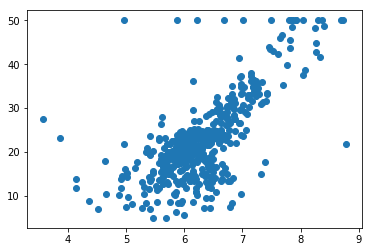

In [35]:
plt.scatter(x, y)

上图中可以看出最大值的点可能是因为极限的限制，导致无效，需要去除

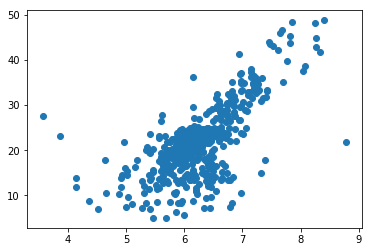

In [36]:
x = x[y<50]
y = y[y<50]
plt.scatter(x, y)

### b、使用简单线性回归

### 1、实现预测

In [37]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y)

In [38]:
x_train.shape

(367,)

In [39]:
%run lib/simplelinearregression

In [40]:
reg = SimpleLinearRegression2()
reg.fit(x_train, y_train)

SimpleLinearRegression1

In [41]:
reg.a_

7.763851779661665

In [42]:
reg.b_

-26.820265925968105

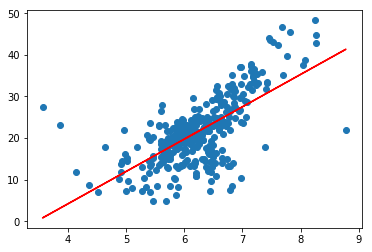

In [43]:
plt.scatter(x_train, y_train)
plt.plot(x_train, reg.predict(x_train), color='r')

In [44]:
y_predict = reg.predict(x_test)

### 2、MSE


$$MSE = \frac{1}{m}\sum\limits_{i=1}^{m}(y_{test}^{(i)}-\hat{y}_{test}^{(i)})^{2}$$

In [45]:
mse_test = np.sum((y_test - y_predict) ** 2) / len(y_test)

In [46]:
#虽然有值， 但量纲为平方
mse_test

34.295730527098755

### 3、RMSE

In [47]:
#可以解释为平均误差为6.48万美元左右
import math
rmse_test = math.sqrt(mse_test)
rmse_test

5.8562556746695025

### 4、MAE


$$MAE = \frac{1}{m}\sum\limits_{i=1}^{m}|y_{test}^{(i)}-\hat{y}_{test}^{(i)}|$$

In [48]:
mae_test = np.sum(np.abs(y_test - y_predict)) / len(y_test)

In [49]:
# mae衡量的误差比rmse要小
mae_test

4.281400016905596

## 四、误差计算函数封装

In [50]:
% run lib/accuracy_score

In [51]:
mse(y_test, reg.predict(x_test))

34.295730527098755

In [52]:
amse(y_test, reg.predict(x_test))

NameError: name 'amse' is not defined

In [ ]:
mae(y_test, reg.predict(x_test))

## 五、scikit-learn中的MSE和MAE


没有RMSE，需要对MSE开方计算

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [ ]:
y_predict = reg.predict(x_test)
mean_squared_error(y_test, y_predict)

In [ ]:
mean_absolute_error(y_test, y_predict)

In [ ]:
RMSE = np.sqrt(mean_squared_error(y_test, y_predict))
RMSE

## 六、R Square 



$$R^{2} = 1 - \frac{\sum\limits_i(\hat{y}^{(i)} - y^{(i)})^2}{\sum\limits_i(\overline{y}^{(i)} - y^{(i)})^2} = 1 - \frac{\sum\limits_i(\hat{y}^{(i)} - y^{(i)})^2/m}{\sum\limits_i(\overline{y}^{(i)} - y^{(i)})^2/m}$$

$$= 1 - \frac{MSE(\hat{y},y)}{Var(y)}$$

In [54]:
#直接计算R2 score
1 - mean_squared_error(y_test, y_predict) / np.var(y_test)

0.5140988406021297

In [53]:
#封装的函数lib/accuracy_score
r2_score(y_test, y_predict)

0.5140988406021297

In [55]:
np.var(y_test)

70.5817013682332

In [57]:
#可以将score函数封装到simplelinearregression中，然后直接调用
# reg.score(x_test, y_test)